### 22. Generate Parentheses
Input: n = 3 <br>
Output: ["((()))","(()())","(())()","()(())","()()()"] <br>
method 1: dynamic programming

In [10]:
n=2
dp = [[] for _ in range(n+1)]
dp[0].append('')
for i in range(n+1):
    for j in range(i):
        dp[i] += ['(' + x + ')' + y for x in dp[j] for y in dp[i-j-1]]
        print(dp)
print(dp[n])

[[''], ['()'], []]
[[''], ['()'], ['()()']]
[[''], ['()'], ['()()', '(())']]
['()()', '(())']


In [12]:
# method 2: backtracking
def dfs(left, right, s):
    if len(s) == n * 2:
        res.append(s)
        return
    if left < n:
        dfs(left + 1, right, s + '(')
    if right < left:
        dfs(left, right + 1, s + ')')
res = []
dfs(0, 0, '')
print(res)

['(())', '()()']


### 17. Letter Combinations of a Phone Number
Input: digits = "23"  <br>
Output: ["ad","ae","af","bd","be","bf","cd","ce","cf"]  <br>

In [ ]:
digits = '23'
def backtrack(res, subset, index, digits):
    if len(digits) == index:
        res.append(''.join(subset))
        return 
    for i in mapping[digits[index]]:
        subset.append(i)
        backtrack(res, subset, index+1, digits)
        subset.pop()
mapping = {'2':'abc', '3':'def', '4':'ghi', '5':'jkl', '6':'mno', '7':'pqrs', '8':'tuv', '9':'wxyz'}
res = []
backtrack(res, [], 0, digits)
print(res)

In [46]:
digits = '234'
ans = ['']
for i in digits:
    tmp = []
    for e_pre in ans:
        for e_pos in mapping[i]:
            tmp.append(e_pre+e_pos)
    ans = tmp
    print(tmp)
print(ans)

['a', 'b', 'c']
['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']
['adg', 'adh', 'adi', 'aeg', 'aeh', 'aei', 'afg', 'afh', 'afi', 'bdg', 'bdh', 'bdi', 'beg', 'beh', 'bei', 'bfg', 'bfh', 'bfi', 'cdg', 'cdh', 'cdi', 'ceg', 'ceh', 'cei', 'cfg', 'cfh', 'cfi']
['adg', 'adh', 'adi', 'aeg', 'aeh', 'aei', 'afg', 'afh', 'afi', 'bdg', 'bdh', 'bdi', 'beg', 'beh', 'bei', 'bfg', 'bfh', 'bfi', 'cdg', 'cdh', 'cdi', 'ceg', 'ceh', 'cei', 'cfg', 'cfh', 'cfi']


### 79. Word Search
Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCCED" <br>
Output: true <br>
backtracking <br>

In [35]:
from collections import defaultdict
from collections import Counter
board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]
word = "ABCCED"

def dfs2(i, j, k, board, word):
    # recursion returns False if (i,j) is out of bounds or board[i][j] != word[k] (current target letter)
    if i<0 or j<0 or i>=len(board) or j>=len(board[0]) or k >= len(word) or word[k] != board[i][j]:
        return False
    # if this statement is true, meaning the last letter in the word is found
    if k == len(word)-1:
        return True
    directions = [(1,0), (-1, 0), (0,1), (0,-1)]
    for x, y in directions:
        # change current board[i] since cannot use the same letter twice in board
        tmp = board[i][j]
        board[i][j] = -1
        # if dfs returns True, then return True so there will be no futher dfs
        if dfs2(i+x, j+y, k+1, board, word):
            return True
        board[i][j] = tmp
        
# count number of letters in board and store it in a dictionary
boardDic = defaultdict(int)
for i in range(len(board)):
    for j in range(len(board[0])):
        boardDic[board[i][j]] += 1
# defaultdict={'A': 2, 'B': 1, 'C': 2, 'E': 3, 'S': 2, 'F': 1, 'D': 1}
# count number of letters in word
# check if board has all the letters in the word
wordDic = Counter(word)
# Counter({'C': 2, 'A': 1, 'B': 1, 'E': 1, 'D': 1})
for c in wordDic:
    if c not in boardDic or boardDic[c] < wordDic[c]:
        print('Flase')
# traverse through board and if word[0] == board[i][j], call the DFS function
for i in range(len(board)):
    for j in range(len(board[0])):
        if board[i][j] == word[0]:
            if dfs2(i, j, 0, board, word):
                print('True')

True


### 130. Surrounded Regions
Input: board = [["X","X","X","X"],["X","O","O","X"],["X","X","O","X"],["X","O","X","X"]]  <br>
Output: [["X","X","X","X"],["X","X","X","X"],["X","X","X","X"],["X","O","X","X"]] <br>
Explanation: Notice that an 'O' should not be flipped if: <br>
- It is on the border, or <br>
- It is adjacent to an 'O' that should not be flipped. <br>
The bottom 'O' is on the border, so it is not flipped. <br>
The other three 'O' form a surrounded region, so they are flipped. 


### 907. Sum of Subarray Minimums
Input: arr = [3,1,2,4]  <br>
Output: 17 <br>
Explanation:  <br>
Subarrays are [3], [1], [2], [4], [3,1], [1,2], [2,4], [3,1,2], [1,2,4], [3,1,2,4].  <br>
Minimums are 3, 1, 2, 4, 1, 1, 2, 1, 1, 1. <br>
Sum is 17.

In [77]:
arr = [11,81,94,43,3]

# dynamic programming (Note: this solution exceed memory limit ...)
mod = (10 ** 9) + 7
L = len(arr)
dp = [[]]*(int((L+1)*L/2))
for i in range(L):
    dp[i] = [arr[i]]
j = L
while L > 0:
    gap = j - L + 1
    for i in range(L-1):
        dp[j] = dp[i] + dp[i+gap]
        j += 1
    L -= 1
# res = 0
# for i in range(len(dp)):
#     res += min(dp[i])
resm = [min(el) for el in dp]
res = sum(resm) % mod
print(dp,res)


# dp + stack
mod = (10 ** 9) + 7
stack = []
dp = [0] * len(arr)
for i, n in enumerate(arr):
    print(stack)
    print(dp)
    while stack and arr[stack[-1]] >= n:
        stack.pop()
    if stack:
        dp[i] = dp[stack[-1]] + (n * (i - stack[-1]))
    else:
        dp[i] = n * (i + 1)
    stack.append(i)
print(sum(dp)%mod)
print(dp, stack)

[[11], [81], [94], [43], [3], [11, 81], [81, 94], [94, 43], [43, 3], [11, 81, 94], [81, 94, 43], [94, 43, 3], [11, 81, 94, 43], [81, 94, 43, 3], [11, 81, 94, 43, 3]] 444
[]
[0, 0, 0, 0, 0]
[0]
[11, 0, 0, 0, 0]
[0, 1]
[11, 92, 0, 0, 0]
[0, 1, 2]
[11, 92, 186, 0, 0]
[0, 3]
[11, 92, 186, 140, 0]
444
[11, 92, 186, 140, 15] [4]


### 70. Climbing Stairs
You are climbing a staircase. It takes n steps to reach the top. <br>
Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

In [9]:
import numpy as np
n = 5
dp = np.array([[1,1],[1,0]])
res = np.array([[1,1],[1,0]])
for i in range(n-1):
    res = np.dot(res, dp)
print(res[0][0])

dp = [0] * (n + 1)
dp[1], dp[2] = 1, 2
for i in range(3, n+1):
    dp[i] = dp[i-1] + dp[i-2]
print(dp[-1])

8
8


### 931. Minimum Falling Path Sum
Given an n x n array of integers matrix, return the minimum sum of any falling path through matrix.<br>
A falling path starts at any element in the first row and chooses the element in the next row that is either directly below or diagonally left/right. <br>
Specifically, the next element from position (row, col) will be (row + 1, col - 1), (row + 1, col), or (row + 1, col + 1).

In [22]:
# complexity: time O(n^2)
matrix = [[2,1,3],[6,5,4],[7,8,9]]
n = len(matrix)
for i in range(1, n):
    for j in range(n):
        # first column, add the minimum of the two elements above
        if j == 0:
            matrix[i][j] += min(matrix[i-1][j], matrix[i-1][j+1])
        # last column, add the minimum of the two elements above
        elif j == n-1:
            matrix[i][j] += min(matrix[i-1][j-1], matrix[i-1][j])
        # middle columns, add the minimum of the three elements above
        else:
            matrix[i][j] += min(matrix[i-1][j-1], matrix[i-1][j], matrix[i-1][j+1])
        print(matrix)
print(min(matrix[-1]))

[[2, 1, 3], [7, 5, 4], [7, 8, 9]]
[[2, 1, 3], [7, 6, 4], [7, 8, 9]]
[[2, 1, 3], [7, 6, 5], [7, 8, 9]]
[[2, 1, 3], [7, 6, 5], [13, 8, 9]]
[[2, 1, 3], [7, 6, 5], [13, 13, 9]]
[[2, 1, 3], [7, 6, 5], [13, 13, 14]]
13


### 198. House Robber
You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected and it will automatically contact the police if two adjacent houses were broken into on the same night. <br>
Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.

In [47]:
nums = [1,7,9,4,1,0,10]

# dynamic programming, complexity: time O(n), space O(n)
# cannot rob adjacent ones, but makes no sense to skip more than two houses, 
# so the number of houses needs to be skipped is between 1 and 2. 
def rob(nums):
    if len(nums) == 1:
        return nums[0]
    if len(nums) == 2:
        return max(nums)
    dp = [0] * len(nums)
    dp[0:2] = nums[0:2]
    for i in range(2, len(nums)):
        if i == 2:
            dp[i] = nums[i] + nums[i-2]
        else:
            dp[i] = nums[i] + max(dp[i-2], dp[i-3])
        print(dp)
    return max(dp)
rob(nums)



[1, 7, 10, 0, 0, 0, 0]
[1, 7, 10, 11, 0, 0, 0]
[1, 7, 10, 11, 11, 0, 0]
[1, 7, 10, 11, 11, 11, 0]
[1, 7, 10, 11, 11, 11, 21]


21

In [50]:
# rolling window: remember the max gain at the next 3 houses from current position
# time O(n), space O(1)
# bottom up
def robRWB(nums):
    house1, house2, house3 = 0, 0, 0
    for i in reversed(nums):
        tmp = house1
        house1 = i + max(house2, house3)
        house3, house2 = house2, tmp
    return max(house1, house2)
print(robRWB(nums))

# top down 
def robRWT(nums):
    pre1, pre2 = 0, 0
    for i in nums:
        pre1, pre2 = max(i+pre2, pre1), pre1
        print(pre1, pre2)
    return pre1
robRWT(nums)

21
1 0
7 1
10 7
11 10
11 11
11 11
21 11


21

### 1143. Longest Common Subsequence
Given two strings text1 and text2, return the length of their longest common subsequence. If there is no common subsequence, return 0.<br>
A subsequence of a string is a new string generated from the original string with some characters (can be none) deleted without changing the relative order of the remaining characters.<br>
For example, "ace" is a subsequence of "abcde".

In [80]:
text1 = "oxcpqrsvwf"
text2 = "shmtulqrypy"

# dynamic programming
# store the max length of common subsquence of text1[0:i] and text2[0:j] to dp[i][j]
# complexity: time O(n*m), space O(n*m)
dp = [[0]*(len(text2)+1) for _ in range(len(text1)+1)]
for i in range(len(text1)):
    for j in range(len(text2)):
        if text1[i] == text2[j]:
            dp[i][j] = dp[i-1][j-1] + 1
        else:
            dp[i][j] = max(dp[i-1][j], dp[i][j-1])
print(dp)
dp[-2][-2]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0], [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0], [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0], [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0], [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


2

In [81]:
from pandas import *
print(DataFrame(dp))

    0   1   2   3   4   5   6   7   8   9   10  11
0    0   0   0   0   0   0   0   0   0   0   0   0
1    0   0   0   0   0   0   0   0   0   0   0   0
2    0   0   0   0   0   0   0   0   0   0   0   0
3    0   0   0   0   0   0   0   0   0   1   1   0
4    0   0   0   0   0   0   1   1   1   1   1   0
5    0   0   0   0   0   0   1   2   2   2   2   0
6    1   1   1   1   1   1   1   2   2   2   2   0
7    1   1   1   1   1   1   1   2   2   2   2   0
8    1   1   1   1   1   1   1   2   2   2   2   0
9    1   1   1   1   1   1   1   2   2   2   2   0
10   0   0   0   0   0   0   0   0   0   0   0   0


In [113]:
# time O(n*m), space O(min(n, m)) method
text1 = "oxcpqrsvwf"
text2 = "shmtulqrypysfdsfsdf"
m, n = map(len, (text1, text2))
if m < n:
    text1, text2 = text2, text1
dp = [0] * (min(n,m) + 1)
for c in text1:
    preRow, preRowPreCol = 0, 0
    for j, d in enumerate(text2):
        preRow, preRowPreCol = dp[j+1], preRow
        if c == d:
            dp[j+1] = preRowPreCol + 1 
        else:
            dp[j+1] = max(dp[j], preRow)
print(dp[-1])

4


In [114]:
dp

[0, 0, 0, 0, 1, 1, 2, 3, 3, 3, 4]

### 121. Best Time to Buy and Sell Stock

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

In [32]:
prices = [7,1,5,3,6,4]

dp = [0] * len(prices)
dp[0] = [prices[0], 0]
for i in range(1, len(prices)):
    min_price = min(prices[i], dp[i-1][0])
    max_profit = max(dp[i-1][1], prices[i]-dp[i-1][0])
    dp[i] = [min_price, max_profit]
    print(dp)
print(dp[-1][1])

dp = [[0 for _ in range(2)] for _ in range(len(prices))]
dp[0][0], dp[0][1] = 0, -float("inf")
for i in range(1, len(prices)):
    dp[i][0] = max(dp[i-1][0], dp[i-1][1] - prices[i])
    dp[i][1] = max(dp[i-1][1], dp[i-1][0] + prices[i])
    print(dp)

[[7, 0], [1, 0], 0, 0, 0, 0]
[[7, 0], [1, 0], [1, 4], 0, 0, 0]
[[7, 0], [1, 0], [1, 4], [1, 4], 0, 0]
[[7, 0], [1, 0], [1, 4], [1, 4], [1, 5], 0]
[[7, 0], [1, 0], [1, 4], [1, 4], [1, 5], [1, 5]]
5
[[0, -inf], [0, 1], [0, 0], [0, 0], [0, 0], [0, 0]]
[[0, -inf], [0, 1], [0, 5], [0, 0], [0, 0], [0, 0]]
[[0, -inf], [0, 1], [0, 5], [2, 5], [0, 0], [0, 0]]
[[0, -inf], [0, 1], [0, 5], [2, 5], [2, 8], [0, 0]]
[[0, -inf], [0, 1], [0, 5], [2, 5], [2, 8], [4, 8]]


In [1]:
prices = [7,1,5,3,6,4]
def maxProfit(prices):
    low = float('inf')
    max_profit = 0
    for p in prices:
        low = min(low, p) 
        max_profit = max(max_profit, p-low)
    return max_profit
maxProfit(prices)

5

### 122. Best Time to Buy and Sell Stock II
You are given an integer array prices where prices[i] is the price of a given stock on the ith day.

On each day, you may decide to buy and/or sell the stock. You can only hold at most one share of the stock at any time. However, you can buy it then immediately sell it on the same day.

Find and return the maximum profit you can achieve.

In [20]:
prices = [7,1,5,3,6,4]

# DP
dp = [[0 for _ in range(2)] for _ in range(len(prices)+1)]
dp[0][0], dp[0][1] = 0 , -float("inf")
for i in range(1, len(prices)+1):
    # dp[i][0] is the cash flow if you decided whether to sell the i-1 stock
    # if you hold, dp[i][0] = dp[i-1][0]; if you sell, dp[i][0] = dp[i-1][1]+prices[i-1] (add the price into your previous cash flow)
    dp[i][0] = max(dp[i-1][0], dp[i-1][1]+prices[i-1])
    # dp[i][1] is the cash flow if you decided whether to buy the i-1 stock
    # if you hold, dp[i][1] = dp[i-1][1]; if you buy,  dp[i][1] = dp[i-1][0]-prices[i-1] (subtract the price from your previous cash flow)
    dp[i][1] = max(dp[i-1][1], dp[i-1][0]-prices[i-1])
    print(dp)
dp[-1][0] # return the cash flow of your last sell

[[0, -inf], [0, -7], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[0, -inf], [0, -7], [0, -1], [0, 0], [0, 0], [0, 0], [0, 0]]
[[0, -inf], [0, -7], [0, -1], [4, -1], [0, 0], [0, 0], [0, 0]]
[[0, -inf], [0, -7], [0, -1], [4, -1], [4, 1], [0, 0], [0, 0]]
[[0, -inf], [0, -7], [0, -1], [4, -1], [4, 1], [7, 1], [0, 0]]
[[0, -inf], [0, -7], [0, -1], [4, -1], [4, 1], [7, 1], [7, 3]]


7

### 309. Best Time to Buy and Sell Stock with Cooldown
You are given an array prices where prices[i] is the price of a given stock on the ith day.

Find the maximum profit you can achieve. You may complete as many transactions as you like (i.e., buy one and sell one share of the stock multiple times) with the following restrictions:

After you sell your stock, you cannot buy stock on the next day (i.e., cooldown one day).
Note: You may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).

In [27]:
prices = [1,2,3,0,2]

dp = [[0 for _ in range(3)] for _ in range(len(prices))]
dp[0][0], dp[0][1], dp[0][2] = -prices[0], 0, -float("inf") # max profit with states: [buy, cooldown, sell]
print(dp)
max_prev_buy = dp[0][0]
for i in range(1, len(prices)):
    # the i-th day is a cooldown, meaning the max profit is the max profit of the i-1 -th day of any state
    dp[i][1] = max(dp[i-1][1], dp[i-1][0], dp[i-1][2]) 
    # buy the i-th stock, provided the i-1 -th day is a cooldown
    dp[i][0] = dp[i-1][1] - prices[i] 
    # sell the i-th stock, add the sold prices to the max cash flow after you bought your last stock
    dp[i][2] = max_prev_buy + prices[i]
    # tracking the max cash flow after a stock is bought
    max_prev_buy = max(max_prev_buy, dp[i][0])
    print(dp, max_prev_buy)

max(dp[-1][1], dp[-1][2])

[[-1, 0, -inf], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[-1, 0, -inf], [-2, 0, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0]] -1
[[-1, 0, -inf], [-2, 0, 1], [-3, 1, 2], [0, 0, 0], [0, 0, 0]] -1
[[-1, 0, -inf], [-2, 0, 1], [-3, 1, 2], [1, 2, -1], [0, 0, 0]] 1
[[-1, 0, -inf], [-2, 0, 1], [-3, 1, 2], [1, 2, -1], [0, 2, 3]] 1


3

### 980. Unique Paths III
You are given an m x n integer array grid where grid[i][j] could be:

1 representing the starting square. There is exactly one starting square.<br>
2 representing the ending square. There is exactly one ending square.<br>
0 representing empty squares we can walk over.<br>
-1 representing obstacles that we cannot walk over.<br>
Return the number of 4-directional walks from the starting square to the ending square, that walk over every non-obstacle square exactly once.<br>
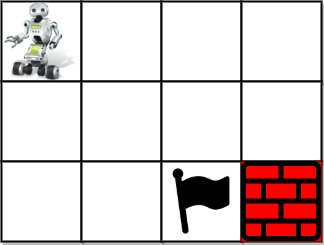

In [3]:
grid = [[1,0,0,0],[0,0,0,0],[0,0,2,-1]]

# backtracking + dfs
# search for starting location, end location, and all non-obstacle locations
start, end = None, None
visit = set()
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j] == 0:
            visit.add((i, j))
        elif grid[i][j] == 1:
            start = (i, j)
        elif grid[i][j] == 2:
            end = (i, j)
            visit.add((i, j))
# moving through the grid to search for valid paths
def backtrack(x, y, visit):
    # detecting if search terminates and if all non-obstacle nodes have been visited
    if (x, y) == end:
        return len(visit) == 0
    # initialise result
    res = 0
    # search all directions from the current node
    for (i, j) in ((x-1, y), (x+1, y), (x, y-1), (x, y+1)):
        if (i, j) in visit: # if (i, j) is a non-obstacle node that has not been visited
            visit.remove((i, j)) # mark (i, j) as visited
            res += backtrack(i, j, visit) # dfs for valid paths, if found one, add one to res
            visit.add((i, j)) # backtrack to the current node and search from another direction
    return res
backtrack(start[0], start[1], visit)

2

### 55. Jump Game
You are given an integer array nums. You are initially positioned at the array's first index, and each element in the array represents your maximum jump length at that position.

Return true if you can reach the last index, or false otherwise.

In [7]:
nums = [2,3,1,4,4]
def canJump(nums):
    flag = True
    for i in range(len(nums)-2, -1, -1):
        # if position i allows 0 step, we need to find a location that allow us to jump over position i
        if nums[i] == 0:
            flag = False
            for j in range(i-1,-1,-1):
                # if we found a location j allows jump length nums[j] that can cover the distance btween i and j
                # we can jump over location i
                if nums[j] > i-j:
                    flag = True
                    break
            # if we cannot jump over location i, means we will get trapped here, and cannot reach the last index
            if flag==False: break
    return flag
canJump(nums)

True

In [8]:
n = len(nums)
dp = [False] * n
dp[-1] = True
for i in range(n-2, -1, -1):
    for j in range(nums[i] + 1):
        if dp[i+j]:
            dp[i] = True
            break
dp[0]

True

In [11]:
# time O(n) solution
nums = [2,3,1,4,4]
# take curr vairbale to keep the current maxinum jump
def canJump(nums):
    curr = nums[0]
    # traverse all the elements through loop
    for i in range(1, len(nums)):
        # if the current index i is less than current maxinum jump curr (curr - 1 jump to reach i)
        # it means it is not optimal to jump to the current index,
        # so we should keep the current maximum jump, vice versa
        # if we jump to a location where the updated curr from the last step is 0
        # it is not possible to excape from this location, if it is not the last location, return False
        if curr == 0:
            return False
        curr -= 1
        curr = max(curr, nums[i])
    return True
canJump(nums)

True

### 790. Domino and Tromino Tiling
You have two types of tiles: a 2 x 1 domino shape and a tromino shape. You may rotate these shapes.

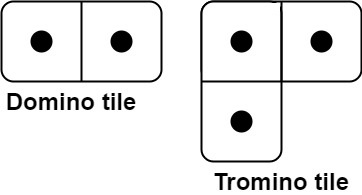 

Example 1: <br>
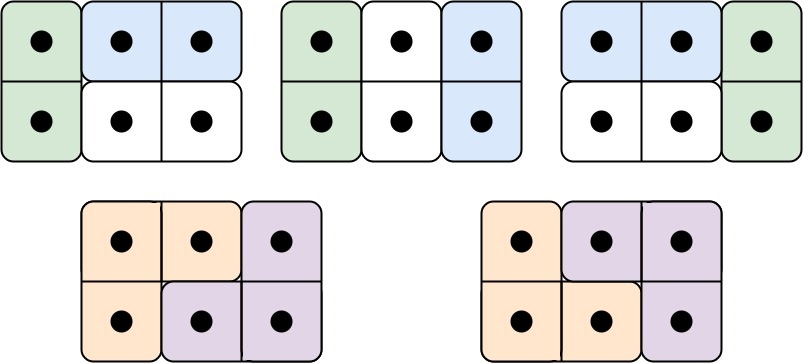 

<img src="https://assets.leetcode.com/users/images/de639bbf-995e-48da-96ee-47bc830cd220_1639109512.768774.jpeg" width="400" align=left> <img src="https://assets.leetcode.com/users/images/875bd993-2f8d-44f5-95eb-c113e8983cc8_1639109494.0658832.jpeg" width="400">

In [13]:
n = 3
def numTilings(n):
    if n < 3:
        return n
    # dp[i-1] denotes the number of ways to tile a 2*i board
    dp = [0] * n
    # dp2[i] denotes the number of ways to tile a 2*i board and 1 additional square left below (or above symmetrically)
    dp2 = [0] * n
    
    dp[0], dp[1] = 1, 2
    dp2[0], dp2[1] = 0, 1
    
    for i in range(2, n):
        dp[i] = dp[i-1] + dp[i-2] + 2*dp2[i-1]
        dp2[i] = dp2[i-1] + dp[i-2]
    return dp[-1] % (10**9 + 7)

numTilings(n)

5

### 926. Flip String to Monotone Increasing
A binary string is monotone increasing if it consists of some number of 0's (possibly none), followed by some number of 1's (also possibly none).

You are given a binary string s. You can flip s[i] changing it from 0 to 1 or from 1 to 0.

Return the minimum number of flips to make s monotone increasing.

In [42]:
s = "010110"

In [38]:
# at position i, lhs is the number of 1s in s[:i] (potential to change them to 0s)
# rhs is the number of 0s in s[i:] (potential to change them to 1s)
min_flips = float("inf")
LHS, RHS = 0, 0
# initialize RHS with total number of 0s
for i in s:
    RHS += 1 - int(i) 
min_flips = min(min_flips, LHS+RHS)
# at position i, total number of flips is LHS+RHS
# update min_flips if LHS+RHS < min_flips
for i in s:
    LHS += int(i)
    RHS -= 1-int(i)
    min_flips = min(min_flips, LHS+RHS)
min_flips

2

In [39]:
ones, ans = 0, 0
for i in s:
    # discard all initail 0s, and change everything faterwards to 1s or 0s
    if i == "1":
        ones += 1
    elif ones: # under this condition, there must be one flip
        ans += 1
        ones -= 1
ans

2

In [49]:
# discard all initail 0s, and change everything faterwards to 1s or 0s
start = 0
for i in range(len(s)):
    if s[i] == "1":
        start = i
        break
ones = 0
for i in s[start:]:
    if i == "1":
        ones += 1
ans = min(ones, len(s[start:])-ones)
ans

2

### 918. Maximum Sum Circular Subarray
Given a circular integer array nums of length n, return the maximum possible sum of a non-empty subarray of nums.

A circular array means the end of the array connects to the beginning of the array. Formally, the next element of nums[i] is nums[(i + 1) % n] and the previous element of nums[i] is nums[(i - 1 + n) % n].

A subarray may only include each element of the fixed buffer nums at most once. Formally, for a subarray nums[i], nums[i + 1], ..., nums[j], there does not exist i <= k1, k2 <= j with k1 % n == k2 % n.

In [98]:
nums = [-3,-2,-3]

In [99]:
# Kadane’s Algorithm
n = len(nums)
curMax, bestMax, curMin, bestMin = nums[0], nums[0], nums[0], nums[0]
for n in nums[1:]:
    curMax = max(curMax + n, n) # curMax>0, add n to it; curMax < 0, abandon curMax
    bestMax = max(bestMax, curMax)
    curMin = min(curMin + n, n) # curMin<n, add n to it; curMin > 0, abandon curMin
    bestMin = min(bestMin, curMin) 
    print(curMax, bestMax, curMin, bestMin)
# ans = bestMax, the max non-empty subarry does not cross the boundray
# ans = sum(nums) - bestMin, the max non-empty subarry cross the boundray, but the min subarry does not
ans = bestMax if bestMax < 0 else max(bestMax, sum(nums)-bestMin) # bestMax < 0 means all elements are negative
ans

-2 -2 -5 -5
-3 -2 -8 -8


-2

In [100]:
# DP
max_dp = [i for i in nums]
min_dp = [i for i in nums]
for i in range(1, len(nums)):
    if max_dp[i-1] > 0:
        max_dp[i] += max_dp[i-1]
    if min_dp[i-1] < 0:
        min_dp[i] += max_dp[i-1]
ans = max(max(max_dp), sum(nums) - min(min_dp))
print(max_dp, min_dp)
ans

[-3, -2, -3] [-3, -5, -5]


-2

### 491. Non-decreasing Subsequences
Given an integer array nums, return all the different possible non-decreasing subsequences of the given array with at least two elements. You may return the answer in any order.

In [102]:
nums = [4,6,7,7]

In [125]:
# backtracking
def findSubsequences(nums):
    global res
    res = []
    def backTrack(A, cur, idx):
        if len(cur)>1 and cur==sorted(cur) and cur not in res:
            res.append(cur[:])
        for i in range(idx, len(A)):
            cur.append(A[i])
            backTrack(A, cur, i+1)
            cur.pop()
    
    backTrack(nums,[],0)
    return res

findSubsequences(nums)

[[4, 6], [4, 6, 7], [4, 6, 7, 7], [4, 7], [4, 7, 7], [6, 7], [6, 7, 7], [7, 7]]

In [137]:
curr = [[nums[0]]]
for x in nums[1:]:
    curr += [y + [x] for y in curr if x >= y[-1]]
    curr += [[x]]
    
curr = [tuple(x) for x in curr if len(x) >= 2]
[list(x) for x in set(curr)]

[[4, 7], [6, 7], [4, 6], [4, 6, 7, 7], [7, 7], [4, 7, 7], [4, 6, 7], [6, 7, 7]]

In [138]:
# backtracking 2, time O(n*2^n), space O(n)
# iterate though all elements; then take the following options
# 1. pick that element
# 2. skip it
# 3. when we complete the iteration, check if len(cur) >= 2
def BT(A, idx, out, ans):
    # base case: if we have reached the end of the input array A
    if idx >= len(A):
        # only add the output if len(out) > 1
        if len(out) > 1:
            ans.add(tuple(out))
        return
    # if the output is empty or if the current element is >= elements in output
    if not out or A[idx] >= out[-1]:
        # add the current element to the output and recursively backtrack (dfs) feasible solutions
        out.append(A[idx])
        BT(A, idx+1, out, ans)
        # backtrack to another path
        out.pop()
    # if no feasible solution found in this path, skip and backtrack
    BT(A, idx+1, out, ans)
# use set to avoid repeating
ans = set()
BT(nums, 0, [], ans)
[list(x) for x in ans]

[[4, 7], [6, 7], [4, 6], [4, 6, 7, 7], [7, 7], [4, 7, 7], [4, 6, 7], [6, 7, 7]]

### 93. Restore IP Addresses
A valid IP address consists of exactly four integers separated by single dots. Each integer is between 0 and 255 (inclusive) and cannot have leading zeros.

For example, "0.1.2.201" and "192.168.1.1" are valid IP addresses, but "0.011.255.245", "192.168.1.312" and "192.168@1.1" are invalid IP addresses.
Given a string s containing only digits, return all possible valid IP addresses that can be formed by inserting dots into s. You are not allowed to reorder or remove any digits in s. You may return the valid IP addresses in any order.

In [142]:
s = "101023"

In [148]:
# backtracking
class Solution:
    def valid(self, tmp): # define backtracking constraints
        if len(tmp) > 3 or len(tmp) == 0: # case 1, length of IP addr element should be <=3 and >0
            return False
        if len(tmp) > 1 and tmp[0] == '0': # case 2, if length of IP addr element >1, the first num cannot be 0
            return False
        if len(tmp) and int(tmp) > 255: # case 3, IP addr element should <= 255
            return False
        return True

    def BT(self, s, res, cur, idx, dots):
        if dots == 3: # when three dots has been added
            if self.valid(s[idx:]): # check if the last element satisfies the constraints
                res.append(cur + s[idx:]) # adding the current elements and the last element to the solution
            return
        for i in range(idx, max(idx+3, len(s))): # check from current index and at most the next 2 indexs
            if self.valid(s[idx:i+1]): # check if element s[idx:i+1] (x, xx, or xxx) satisfies contrainst
                newCur = cur + s[idx:i+1] + '.' # add this element to the current result and add a dot
                self.BT(s, res, newCur, i+1, dots+1) # backtracking other solutions
    
    def restoreIpAddresses(self, s):
        res = []
        self.BT(s, res, "", 0, 0)
        return res
    
res = Solution()
res.restoreIpAddresses(s)

['1.0.10.23', '1.0.102.3', '10.1.0.23', '10.10.2.3', '101.0.2.3']

### 131. Palindrome Partitioning
Given a string s, partition s such that every substring of the partition is a palindrome. Return all possible palindrome partitioning of s.

In [170]:
s = "aab"

In [171]:
# backtracking, time O(n * 2^n), space O(n)
class Solutions():
    def valid(self, tmp): # defining constraints
        return tmp == tmp[::-1]

    def BT(self, s, res, cur):
        if not s: # if all strings have been checked, add the current solution the result
            res.append(cur)
        for i in range(1, len(s)+1):
            if self.valid(s[:i]): # check if s[:i] is valid
                newCur = cur + [s[:i]] # add element s[:i] to the current solution
                self.BT(s[i:], res, newCur) # becktracking valid results in s[i:]

    def partition(self, s):
        res = []
        self.BT(s, res, [])
        return res
    
res = Solutions()
res.partition(s)

[['a', 'a', 'b'], ['aa', 'b']]

In [174]:
# DP
# dp[i] stores all possible palindrome partitions of string s[i:]
n = len(s)
dp = [[] for _ in range(n+1)]
dp[-1].append([]) 
for i in range(n-1, -1, -1):
    for j in range(i+1, n+1):
        cur = s[i:j]
        if cur == cur[::-1]: # if s[i:j] is palindrome 
            for k in dp[j]:
                dp[i].append([cur]+k) # add s[i:j] the palindromes in s[j:], now we have palindromes in s[i:] 
        print(dp)
dp[0]

[[], [], [['b']], [[]]]
[[], [['a', 'b']], [['b']], [[]]]
[[], [['a', 'b']], [['b']], [[]]]
[[['a', 'a', 'b']], [['a', 'b']], [['b']], [[]]]
[[['a', 'a', 'b'], ['aa', 'b']], [['a', 'b']], [['b']], [[]]]
[[['a', 'a', 'b'], ['aa', 'b']], [['a', 'b']], [['b']], [[]]]


[['a', 'a', 'b'], ['aa', 'b']]

### 472. Concatenated Words
Given an array of strings words (without duplicates), return all the concatenated words in the given list of words.

A concatenated word is defined as a string that is comprised entirely of at least two shorter words in the given array.

In [7]:
words = ["cat","cats","catsdogcats","dog","dogcatsdog","hippopotamuses","rat","ratcatdogcat"]

In [15]:
# Trie & DFS, time O(n), space O(n)
from collections import defaultdict
# create a trie data structure for all given words
ddic = lambda: defaultdict(ddic)
trie = ddic()
for word in words:
    cur = trie
    for char in word:
        cur = cur[char]
    cur['end'] = True
def isConcate(word, start):
    # if the current prefix is in the trie
    # DFS to check whether the slice of the word starting after the prefix is a concatenated word
    cur = trie
    for i in range(start, len(word)):
        char = word[i]
        if char not in cur:
            return False
        cur = cur[char]
        if 'end' in cur:
            if i+1 == len(word):
                return start != 0 # distinguish simple words from concatenated words
            if isConcat(word, i+1):
                return True
    return False
[word for word in words if isConcate(word, 0)]

defaultdict(<function <lambda> at 0x000001B4F19D4D08>, {})


['catsdogcats', 'dogcatsdog', 'ratcatdogcat']

In [19]:
# Trie + DFS method2 (another way to construct trie data structure)
# step1: insert all the words into the trie
# step2: DFS each word to find concatenated words  
from collections import defaultdict
class TrieNode:
    def __init__(self):
        self.child = defaultdict(TrieNode)
        self.isEnd = False
class Trie:
    def __init__(self):
        self.root = TrieNode()
    def insert(self, word):
        marker = self.root
        for ch in word:
            marker = marker.child[ch]
        marker.isEnd = True

def dfs(word, start, root, count):
    n, marker = len(word), root
    for i in range(start, n):
        marker = marker.child[word[i]]
        if marker.isEnd:
            if i == n-1:
                return count >= 1 # distinguish simple words from concatenate words
            if dfs(word, i+1, root, count+1):
                return True
    return False
trie = Trie()
for word in words:
    trie.insert(word)
[word for word in words if dfs(word, 0, trie.root, 0)]

['catsdogcats', 'dogcatsdog', 'ratcatdogcat']

In [27]:
# Pure DFS (prefix + suffix)
d = set(words)
def dfs(word):
    for i in range(1, len(word)):
        prefix, suffix = word[:i], word[i:]
        if prefix in d and suffix in d:
            return True
        if prefix in d and dfs(suffix):
            return True
    return False
[word for word in words if dfs(word)]

['catsdogcats', 'dogcatsdog', 'ratcatdogcat']

In [25]:
# DP
s = set(words)
dic = {}
def dfs(word):
    if word in dic:
        return dic[word]
    for i in range(1, len(word)):
        if word[:i] not in s:
            continue
        r = word[i:]
        if r in s or dfs(r):
            dic[word] = True
            return True
    dic[word] = False
    return False
[word for word in words if dfs(word)]

['catsdogcats', 'dogcatsdog', 'ratcatdogcat']

### 1137. N-th Tribonacci Number
The Tribonacci sequence Tn is defined as follows: 

T0 = 0, T1 = 1, T2 = 1, and Tn+3 = Tn + Tn+1 + Tn+2 for n >= 0.

Given n, return the value of Tn.

In [70]:
n = 25

In [71]:
# DP
def tribonacci(n):
    if n == 0:
        return 0
    if n == 1 or n == 2:
        return 1
    dp = [[] for _ in range(n+1)]
    dp[0], dp[1], dp[2] = 0, 1, 1
    for i in range(3, n+1):
        dp[i] = dp[i-1] + dp[i-2] + dp[i-3]
    return dp[-1]

tribonacci(n)

1389537

In [72]:
# recursion
def tribonacci(n):
    if n == 0:
        return 0
    if n == 1 or n == 2:
        return 1
    return tribonacci(n-1) + tribonacci(n-2) + tribonacci(n-3)
tribonacci(n)

1389537

In [73]:
# space O(1)
def tribonacci(n):
    res = [0, 1, 1]
    if n <= 2:
        return res[n]
    for i in range(3, n+1):
        res.append(sum(res))
        res.pop(0)
    return res[-1]
tribonacci(n)

1389537

In [74]:
# matrix
import numpy as np
def tribonacci(n):
    if n == 0:
        return 0
    if n == 1 or n == 2:
        return 1
    t = np.matrix([[0], [1], [1]]) # first three tribonacci num
    M = np.matrix([[0, 1, 0], 
                   [0, 0, 1], 
                  [1, 1, 1]])
    return (M ** (n-2) * t)[-1, 0] # time compexity of matrix multiplication in numpy is O(logN)
tribonacci(n)

1389537

### 1626. Best Team With No Conflicts
You are the manager of a basketball team. For the upcoming tournament, you want to choose the team with the highest overall score. The score of the team is the sum of scores of all the players in the team.

However, the basketball team is not allowed to have conflicts. A conflict exists if a younger player has a strictly higher score than an older player. A conflict does not occur between players of the same age.

Given two lists, scores and ages, where each scores[i] and ages[i] represents the score and age of the ith player, respectively, return the highest overall score of all possible basketball teams.

In [156]:
scores = [1,2,5,7,2,1,2]
ages = [8,8,10,1,2,3,11]

In [157]:
# DP + sorting, time O(n ** 2), space O(n)
hsh = []
for a, s in zip(ages, scores):
    hsh.append((a,s))
hsh.sort()
print(hsh)
dp = [[] for _ in range(len(ages))] # max score when the i-th player is included in the [:i] players
for i in range(len(ages)):
    dp[i] = hsh[i][1]
    for j in range(i):
        if hsh[j][1] <= hsh[i][1]:
            dp[i] = max(dp[i], dp[j] + hsh[i][1]) # add hsh[i][1] to max(dp[:i])
print(dp)
max(dp)

[(1, 7), (2, 2), (3, 1), (8, 1), (8, 2), (10, 5), (11, 2)]
[7, 2, 1, 2, 4, 9, 6]


9

In [158]:
# DP method 2 time O(n ** 2)
dp = [0] * (max(ages) + 1)
hsh = sorted(zip(scores, ages))
for s, a in hsh:
    dp[a] = s + max(dp[:a+1])
dp

[0, 7, 2, 1, 0, 0, 0, 0, 4, 0, 9, 6]

### 45. Jump Game II
You are given a 0-indexed array of integers nums of length n. You are initially positioned at nums[0].

Each element nums[i] represents the maximum length of a forward jump from index i. In other words, if you are at nums[i], you can jump to any nums[i + j] where:

1. 0 <= j <= nums[i] and
2. i + j < n

Return the minimum number of jumps to reach nums[n - 1]. The test cases are generated such that you can reach nums[n - 1].

In [16]:
nums = [2,3,1,1,4]

In [17]:
# DP
def jump(nums):
    dp = [float('inf') for _ in range(len(nums))] # min step start from i to n-1
    dp[-1] = 0
    for i in range(len(nums)-2, -1, -1):
        dp[i] = 1 + min(dp[i: min(i+nums[i]+1, len(nums))])
    print(dp)
    return dp[0]
jump(nums)

[2, 1, 2, 1, 0]


2

In [19]:
# DP method 2
def jump(nums):
    if len(nums) == 1:
        return 0
    dp = [0] * len(nums) # min steps to reach i
    j = 0 
    for i in range(1, len(nums)):
        # find the nearest j that can reach i
        while j + nums[j] < i:
            j += 1
        dp[i] = dp[j] + 1
    print(dp)
    return dp[-1]
jump(nums)

[0, 1, 1, 2, 2]


2

In [26]:
# Greedy, time O(n), space O(1)
def jump(nums):
    if len(nums) == 1:
        return 0
    reachableIdx, prevReachableIdx, res = 0, 0, 0
    for i, num in enumerate(nums):
        if i + num >= reachableIdx:
            reachableIdx = i + num
        if i == prevReachableIdx:
            res += 1
            prevReachableIdx = reachableIdx
            if prevReachableIdx == len(nums) - 1:
                return res
        print("i:",i,"|","num:",num,"|","reachableIdx:",reachableIdx,"|","prevReachableIdx:",prevReachableIdx,"|","res:",res)
jump(nums)

i: 0 | num: 2 | reachableIdx: 2 | prevReachableIdx: 2 | res: 1
i: 1 | num: 3 | reachableIdx: 4 | prevReachableIdx: 2 | res: 1


2

### 1162. As Far from Land as Possible
Given an n x n grid containing only values 0 and 1, where 0 represents water and 1 represents land, find a water cell such that its distance to the nearest land cell is maximized, and return the distance. If no land or water exists in the grid, return -1.

The distance used in this problem is the Manhattan distance: the distance between two cells (x0, y0) and (x1, y1) is |x0 - x1| + |y0 - y1|.

Example 1:<br>
<img src="https://assets.leetcode.com/uploads/2019/05/03/1336_ex1.JPG" width="200">
Input: grid = [[1,0,1],[0,0,0],[1,0,1]] <br>
Output: 2<br>
Explanation: The cell (1, 1) is as far as possible from all the land with distance 2.

Hint:
<img src="https://leetcode.com/problems/as-far-from-land-as-possible/solutions/3043174/Figures/1162/1162A.png" width=512>

In [52]:
grid = [[1,0,1],[0,0,0],[1,0,1]]
def maxDistance(grid):
    import copy
    import numpy as np
    n, m = len(grid), len(grid[0])
    dp = copy.deepcopy(grid)
    dist = 0
    if not np.any(grid):
        return -1
    if np.all(grid):
        retunr -1
    while not np.all(dp):
        dist += 1
        dp_tmp = copy.deepcopy(dp)
        for i in range(n):
            for j in range(m):
                if dp[i][j] == 1:
                    for k,l in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:
                        if 0<=k<n and 0<=l<m:
                            dp_tmp[k][l] = 1
        dp = copy.deepcopy(dp_tmp)
    print(dp)
    return dist
maxDistance(grid)

[[1, 1, 1], [1, 1, 1], [1, 1, 1]]


2

In [67]:
# BFS, time O(n^2)
grid = [[1,0,0,0],[1,0,0,0],[1,0,0,0],[0,0,0,1]]
def maxDistance(grid):
    from collections import deque
    n = len(grid)
    q = deque()
    for i in range(n):
        for j in range(n):
            if grid[i][j] == 1:
                q.append((i, j))
    if not q or len(q) == n*n: # no 'land' or no 'water'
        return -1
    res = 0
    while q:
        size = len(q)
        res += 1
        print(q, res)
        while size:
            size -= 1
            i, j = q.popleft()
            for k, l in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:
                if 0<=k<n and 0<=l<n and grid[k][l] == 0:
                    grid[k][l] = res
                    q.append((k, l))
    print(grid)
    return res-1
maxDistance(grid)

deque([(0, 0), (1, 0), (2, 0), (3, 3)]) 1
deque([(0, 1), (1, 1), (3, 0), (2, 1), (2, 3), (3, 2)]) 2
deque([(0, 2), (1, 2), (3, 1), (2, 2), (1, 3)]) 3
deque([(0, 3)]) 4
[[1, 1, 2, 3], [1, 1, 2, 2], [1, 1, 2, 1], [1, 2, 1, 1]]


3

In [69]:
# DP, time O(n^2)
grid = [[1,0,0,0],[1,0,0,0],[1,0,0,0],[0,0,0,1]]
def maxDistance(grid):
    n = len(grid)
    dp = [[0] * n for _ in range(n)] # min distance from current location to a land
    # from top left to bottom right, dp[i][j] = min(dp[i-1][j], dp[i][j-1])+1, set dp[k][l] to inf when k or l is out of boaders
    for i in range(n):
        for j in range(n):
            if grid[i][j] == 0:
                top = dp[i-1][j] if i else float('inf')
                left = dp[i][j-1] if j else float('inf')
                dp[i][j] = min(top, left) + 1
    print(dp)
    # from bottom right to top left, dp[i][j] = min(dp[i+1][j]+1, dp[i][j+1]+1, dp[i][j])
    # set dp[k][l] to inf when k or l is out of boaders
    for i in range(n-1, -1, -1):
        for j in range(n-1, -1, -1):
            if grid[i][j] == 0:
                bottom = dp[i+1][j] if i+1 < n else float('inf')
                right = dp[i][j+1] if j+1 < n else float('inf')
                dp[i][j] = min(dp[i][j], bottom+1, right+1)
    print(dp)
    res = max(max(row) for row in dp)
    return -1 if res in (0, float('inf')) else res
maxDistance(grid)

[[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [1, 2, 3, 0]]
[[0, 1, 2, 3], [0, 1, 2, 2], [0, 1, 2, 1], [1, 2, 1, 0]]


3

### 72. Edit Distance
Given two strings word1 and word2, return the minimum number of operations required to convert word1 to word2.

You have the following three operations permitted on a word:

- Insert a character
- Delete a character
- Replace a character

#### Example 1:
Input: word1 = "horse", word2 = "ros"<br>
Output: 3<br>
Explanation: <br>
horse -> rorse (replace 'h' with 'r')<br>
rorse -> rose (remove 'r')<br>
rose -> ros (remove 'e')

<img src='https://i.ibb.co/d61gvvm/IMG-0033.jpg' width='400'>

In [11]:
# word1 = "horse"
# word2 = "ros"
word1 = "intention"
word2 = "execution"
# DP time O(nm), space O(nm)
def minDistance(word1, word2):
    n, m = len(word1)+1, len(word2)+1
    dp = [[0]*n for _ in range(m)]
    for i in range(n):
        dp[0][i] = i
    for i in range(m):
        dp[i][0] = i
    for i in range(1, m):
        for j in range(1, n):
            if word2[i-1] != word1[j-1]:
                # need an operation:
                # dp[i-1][j-1]: replace word1[j-1] with word2[i-1]
                # dp[i-1][j]: add word2[i-1] to adjusted word1[:j]
                # dp[i][j-1]: delete word1[j]
                dp[i][j] = min(dp[i-1][j-1], dp[i][j-1], dp[i-1][j]) + 1
            else:
                dp[i][j] = dp[i-1][j-1] # word2[i-1] == word1[j-1], no operation needed
    print(dp)
    return dp[-1][-1]

minDistance(word1, word2)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 3, 4, 5, 6, 7, 8], [2, 2, 2, 3, 4, 4, 5, 6, 7, 8], [3, 3, 3, 3, 3, 4, 5, 6, 7, 8], [4, 4, 4, 4, 4, 4, 5, 6, 7, 8], [5, 5, 5, 5, 5, 5, 5, 6, 7, 8], [6, 6, 6, 5, 6, 6, 5, 6, 7, 8], [7, 6, 7, 6, 6, 7, 6, 5, 6, 7], [8, 7, 7, 7, 7, 7, 7, 6, 5, 6], [9, 8, 7, 8, 8, 7, 8, 7, 6, 5]]


5

### 64. Minimum Path Sum
Given a m x n grid filled with non-negative numbers, find a path from top left to bottom right, which minimizes the sum of all numbers along its path.

Note: You can only move either down or right at any point in time.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2020/11/05/minpath.jpg' width=160>
Input: grid = [[1,3,1],[1,5,1],[4,2,1]]<br>
Output: 7<br>
Explanation: Because the path 1 → 3 → 1 → 1 → 1 minimizes the sum.

In [4]:
grid = [[1,3,1],[1,5,1],[4,2,1]]
# DP, time O(nm), space O(1)
# to reach point (i, j), you have to reach either (i-1, j) or (i, j-1)
# so let grid[i][j] += min(grid[i-1][j], grid[i][j-1])
def minPathSum(grid): 
    n, m = len(grid), len(grid[0])
    def inside(x, y):
        return 0<=x<n and 0<=y<m
    for i in range(n):
        for j in range(m):
            if inside(i-1, j) and inside(i, j-1):
                grid[i][j] += min(grid[i-1][j], grid[i][j-1])
            elif inside(i-1, j):
                grid[i][j] += grid[i-1][j]
            elif inside(i, j-1):
                grid[i][j] += grid[i][j-1]
    print(grid)
    return grid[-1][-1]

minPathSum(grid)

[[1, 4, 5], [2, 7, 6], [6, 8, 7]]


7

In [5]:
def minPathSum(grid): 
    n, m = len(grid), len(grid[0])
    for i in range(1, n):
        grid[i][0] += grid[i-1][0]
    for j in range(1, m):
        grid[0][j] += grid[0][j-1]
    for i in range(1, n):
        for j in range(1, m):
            grid[i][j] += min(grid[i-1][j], grid[i][j-1])
    return grid[-1][-1]
grid = [[1,3,1],[1,5,1],[4,2,1]]
minPathSum(grid)

7

In [11]:
def minPathSum(grid): # space O(n), without modifying the original grid
    n, m = len(grid), len(grid[0])
    dp = [grid[0][0]] * n
    for i in range(1, n):
        dp[i] = dp[i-1] + grid[i][0]
    print(dp)
    for j in range(1, m):
        dp[0] += grid[0][j]
        for i in range(1, n):
            dp[i] = min(dp[i], dp[i-1]) + grid[i][j]
        print(dp)
    return dp[-1]

grid = [[1,3,1],[1,5,1],[4,2,1]]
minPathSum(grid)

[1, 2, 6]
[4, 7, 8]
[5, 6, 7]


7

### 983. Minimum Cost For Tickets
You have planned some train traveling one year in advance. The days of the year in which you will travel are given as an integer array days. Each day is an integer from 1 to 365.

Train tickets are sold in three different ways:

- a 1-day pass is sold for costs[0] dollars,
- a 7-day pass is sold for costs[1] dollars, and
- a 30-day pass is sold for costs[2] dollars.
The passes allow that many days of consecutive travel.

- For example, if we get a 7-day pass on day 2, then we can travel for 7 days: 2, 3, 4, 5, 6, 7, and 8.
Return the minimum number of dollars you need to travel every day in the given list of days.

#### Example 1:
Input: days = [1,2,3,4,5,6,7,8,9,10,30,31], costs = [2,7,15] <br>
Output: 17 <br>
Explanation: For example, here is one way to buy passes that lets you travel your travel plan: <br>
On day 1, you bought a 30-day pass for costs[2] = \\$15 which covered days 1, 2, ..., 30. <br>
On day 31, you bought a 1-day pass for costs[0] = \\$2 which covered day 31. <br>
In total, you spent \\$17 and covered all the days of your travel.

In [15]:
days = [1,2,3,4,5,6,7,8,9,10,30,31]
costs = [2,7,15]
# DP, create a dp list for 356 days (with size of 366 considering 0-index)
# for day i, if we don't travel, dp[i] = dp[i-1]
# if we travel, dp[i] = min(dp[i-1]+costs[0], dp[i-7]+costs[1], dp[i-30]+costs[2])
# Time O(n+365) (n=len(days)), space O(1) (constant)
def minCostTickets(days, costs):
    dp = [float('inf')] * 366
    dp[0] = 0
    travel_day_idx = 0
    for day in range(1, 366): # iterate from day 1 to day 365
        if travel_day_idx < len(days) and day == days[travel_day_idx]: # if we travel on that day
            dp[day] = min(dp[day], dp[day-1]+costs[0]) # if day is covered by previous x-day pass or not
            if day >= 7:
                dp[day] = min(dp[day], dp[day-7]+costs[1]) # if day >= 7, check if it is cheaper to buy a 1-day pass at day-7
            else:
                dp[day] = min(dp[day], costs[1]) # else check if it is cheaper to buy a 7-day pass now
            if day >- 30:
                dp[day] = min(dp[day], dp[day-30]+costs[2])
            else:
                dp[day] = min(dp[day], costs[2])
            travel_day_idx += 1
        else:
            dp[day] = dp[day-1]
    return dp[-1]

minCostTickets(days, costs)

17

In [17]:
# DP method 2
def minCostTickets(days, costs):
    from collections import deque
    cost = 0
    last7 = deque() # save the day and cost of the days that the 7-day pass valid till the cur day
    last30 = deque() # save the day and cost of the days that the 30-day pass valid till the cur day
    for day in days:
        while last7 and last7[0][0] + 7 <= day: 
            last7.popleft() # pop out invalid tickets
        while last30 and last30[0][0] + 30 <= day:
            last30.popleft() # pop out invalid tickets
        last7.append((day, cost+costs[1]))
        last30.append((day, cost+costs[2]))
#         print(last7, last30)
        # compare the cost of 1. buy a 1-day pass; 2. buy a 7-day pass 7 days ago; 3. buy a 30-day pass 30 days ago
        cost = min(cost+costs[0], last7[0][1], last30[0][1]) 
    return cost
minCostTickets(days, costs)

17

### 1402. Reducing Dishes
A chef has collected data on the satisfaction level of his n dishes. Chef can cook any dish in 1 unit of time.

Like-time coefficient of a dish is defined as the time taken to cook that dish including previous dishes multiplied by its satisfaction level i.e. time[i] * satisfaction[i].

Return the maximum sum of like-time coefficient that the chef can obtain after dishes preparation.

Dishes can be prepared in any order and the chef can discard some dishes to get this maximum value.

#### Example 1:
Input: satisfaction = [-1,-8,0,5,-9] <br>
Output: 14 <br>
Explanation: After Removing the second and last dish, the maximum total like-time coefficient will be equal to (-1\*1 + 0\*2 + 5\*3 = 14). <br>
Each dish is prepared in one unit of time.

In [30]:
satisfaction = [-1,-8,0,15,1,-7]
# brutal force, time (n**2), space O(1)
def maxSatisfaction(satisfaction): 
    satisfaction.sort()
    dish = -1
    score = 0
    while satisfaction and dish < 0:
        score_tmp = 0
        for i, s in enumerate(satisfaction):
            score_tmp += (i+1) * s
        score = max(score, score_tmp)
        print(satisfaction, dish, score_tmp)
        dish = satisfaction.pop(0)
    return score
        
maxSatisfaction(satisfaction)

[-8, -7, -1, 0, 1, 15] -1 70
[-7, -1, 0, 1, 15] -8 70
[-1, 0, 1, 15] -7 62
[0, 1, 15] -1 47


70

In [43]:
satisfaction = [-1,-8,0,5,-7]
# DP, time O(n + nlogn), space O(n)
def maxSatisfaction(satisfaction): 
    satisfaction.sort()
    if satisfaction[-1] <= 0:
        return 0
    score = [0] * len(satisfaction)
    for i, s in enumerate(satisfaction):
        score[0] += (i+1) * s
    i = 1
    s = sum(satisfaction)
    dish = satisfaction.pop(0)
    max_score = score[0]
    while satisfaction and dish < 0:
        score[i] = score[i-1] - s
        max_score = max(max_score, score[i])
        s -= dish
        i += 1
        print(score)
        dish = satisfaction.pop(0)
    return max_score
        
maxSatisfaction(satisfaction)

[0, 11, 0, 0, 0]
[0, 11, 14, 0, 0]
[0, 11, 14, 10, 0]


14

In [45]:
satisfaction = [-1,-8,0,5,-7]
# Greedy, time O(n + nlogn), space O(1)
def maxSatisfaction(satisfaction): 
    satisfaction.sort(reverse=True)
    n = len(satisfaction)
    presum, res = 0, 0
    for i in range(n):
        presum += satisfaction[i]
        if presum < 0:
            break
        res += presum
    return res
maxSatisfaction(satisfaction)

14

In [47]:
satisfaction = [-1,-8,0,5,-7]
def maxSatisfaction(satisfaction):
    from itertools import accumulate
    s = list(accumulate(sorted(satisfaction, reverse=True)))
    print(s)
    return sum(n for n in s if n > 0)
maxSatisfaction(satisfaction)

[5, 5, 4, -3, -11]


14

### 87. Scramble String
We can scramble a string s to get a string t using the following algorithm:

If the length of the string is 1, stop.
If the length of the string is > 1, do the following:
Split the string into two non-empty substrings at a random index, i.e., if the string is s, divide it to x and y where s = x + y.
Randomly decide to swap the two substrings or to keep them in the same order. i.e., after this step, s may become s = x + y or s = y + x.
Apply step 1 recursively on each of the two substrings x and y.
Given two strings s1 and s2 of the same length, return true if s2 is a scrambled string of s1, otherwise, return false.

#### Example 1:
**Input**: s1 = "great", s2 = "rgeat" <br>
**Output**: true<br>
**Explanation**: One possible scenario applied on s1 is:<br>
- "great" --> "gr/eat" // divide at random index.
- "gr/eat" --> "gr/eat" // random decision is not to swap the two substrings and keep them in order.
- "gr/eat" --> "g/r / e/at" // apply the same algorithm recursively on both substrings. divide at random index each of them.
- "g/r / e/at" --> "r/g / e/at" // random decision was to swap the first substring and to keep the second substring in the same order.
- "r/g / e/at" --> "r/g / e/ a/t" // again apply the algorithm recursively, divide "at" to "a/t".
- "r/g / e/ a/t" --> "r/g / e/ a/t" // random decision is to keep both substrings in the same order.<br>

The algorithm stops now, and the result string is "rgeat" which is s2.<br>
As one possible scenario led s1 to be scrambled to s2, we return true.

<img src='https://leetcode.com/problems/scramble-string/Figures/87/diagram.drawio.png' width=512>

In [64]:
# DP. 
# s: substring of s1 starting at index i with length of 'length'
# t: substring of s2 starting at index j with length of 'length'
# dp[length][i][j] is a boolean representing whether t is a scrambled version of s
def isScramble(s1, s2):
    n = len(s1)
    if n == 1:
        return s1 == s2
    dp = [[[False for _ in range(n)] for _ in range(n)] for _ in range(n+1)]
    for i in range(n):
        for j in range(n):
            dp[1][i][j] = (s1[i]==s2[j])
    for length in range(2, n+1):
        for i in range(n+1-length):
            for j in range(n+1-length):
                for newLength in range(1, length):
                    dp[length][i][j] |= dp[newLength][i][j] and dp[length-newLength][i+newLength][j+newLength]
                    dp[length][i][j] |= dp[newLength][i][j+length-newLength] and dp[length-newLength][i+newLength][j]
    return dp[n][0][0]

s1, s2 = "abb", "bba"
isScramble(s1, s2)

True

In [3]:
# recursion + memoization (use an unordered map to store previous computational results)
# argument: if two strings are scrambled versions of each others, 
# then they can be split into two non-empty substrings that are also scrambled versions of each others
class Solution:
    def __init__(self):
        self.myMap = {}
    def isScramble(self, s1, s2):
        n = len(s1)
        if s1 == s2:
            return True
        a, b, c = [0] * 26, [0] * 26, [0] * 26 # frequency counting for s1, s2 and current substring
        # check if the current substrings have been calculated
        if (s1 +  s2) in self.myMap:
            return self.myMap[s1 + s2]
        # check all possible splits for substrings
        for i in range(1, n):
            j = n - i
            a[ord(s1[i-1]) - ord('a')] += 1
            b[ord(s2[i-1]) - ord('a')] += 1
            c[ord(s2[j]) - ord('a')] += 1
            if a == b and self.isScramble(s1[:i], s2[:i]) and self.isScramble(s1[i:], s2[i:]):
                self.myMap[s1 + s2] = True
                return True
            if a == c and self.isScramble(s1[:i], s2[j:]) and self.isScramble(s1[i:], s2[:j]):
                self.myMap[s1 + s2] = True
                return True
        self.myMap[s1 + s2] = False
        return False
    
s1, s2 = "abb", "bba"            
res = Solution()
res.isScramble(s1, s2)

True

### 1444. Number of Ways of Cutting a Pizza
Given a rectangular pizza represented as a rows x cols matrix containing the following characters: 'A' (an apple) and '.' (empty cell) and given the integer k. You have to cut the pizza into k pieces using k-1 cuts. 

For each cut you choose the direction: vertical or horizontal, then you choose a cut position at the cell boundary and cut the pizza into two pieces. If you cut the pizza vertically, give the left part of the pizza to a person. If you cut the pizza horizontally, give the upper part of the pizza to a person. Give the last piece of pizza to the last person.

Return the number of ways of cutting the pizza such that each piece contains at least one apple. Since the answer can be a huge number, return this modulo 10^9 + 7.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2020/04/23/ways_to_cut_apple_1.png' width=512>

**Input**: pizza = ["A..","AAA","..."], k = 3<br>
**Output**: 3 <br>
**Explanation**: The figure above shows the three ways to cut the pizza. Note that pieces must contain at least one apple.

In [15]:
pizza, k = ["A..","AAA","..."], 3

class Solution:
    
    def ways(self, pizza, k):
        n, m = len(pizza), len(pizza[0])
        preSum = [[0 for _ in range(m+1)] for _ in range(n+1)] # check if there are apples left in pizza[i:][j:]
        for i in range(n-1, -1, -1):
            for j in range(m-1, -1, -1):
                preSum[i][j] = (pizza[i][j]=='A') + preSum[i+1][j] + preSum[i][j+1] - preSum[i+1][j+1]
#         @lru_cache(None) # memorize previous recursion results to improve computational speed
        def dp(kCur, row, col):
            if preSum[row][col] == 0: # no apple left in pizza[row:][col:]
                return 0
            if kCur == 0: # no ppl left to share the rest of the pizza
                return 1
            res = 0
            for r in range(row+1, n):
                if preSum[row][col] - preSum[r][col] > 0:
                    res = (res + dp(kCur-1, r, col)) % (10**9+7)
            for c in range(col+1, m):
                if preSum[row][col] - preSum[row][c] > 0:
                    res = (res + dp(kCur-1, row, c)) % (10**9+7)
            return res

        return dp(k-1, 0, 0)

res = Solution()
res.ways(pizza, k)

3

### 516. Longest Palindromic Subsequence
Given a string s, find the longest palindromic subsequence's length in s.

A subsequence is a sequence that can be derived from another sequence by deleting some or no elements without changing the order of the remaining elements.

#### Example 1:
**Input**: s = "bbbab" <br>
**Output**: 4 <br>
**Explanation**: One possible longest palindromic subsequence is "bbbb".

In [9]:
s = 'bbbab'
# equivalent to find longest common subsequence of s and s-reverse
# dp, time O(n^2), space O(n^2)
def longestPalindromeSubseq(s):
    s2 = s[::-1]
    dp = [[0]*(len(s)+1) for _ in range(len(s)+1)]
    for i in range(1, len(s)+1):
        for j in range(1, len(s)+1):
            if s[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    print(dp)
    return dp[-1][-1]

longestPalindromeSubseq(s)

[[0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1], [0, 1, 1, 2, 2, 2], [0, 1, 1, 2, 3, 3], [0, 1, 2, 2, 3, 3], [0, 1, 2, 3, 3, 4]]


4

In [10]:
# dp bottom up, space O(n)
def longestPalindromeSubseq(s):
    n = len(s)
    dp = [0] * n # define dp[i][j] (use newdp to store j) as the length of the longest palindromic subsequence in substring s[i:j+1]
    for i in range(n-1, -1, -1):
        newdp = [0] * n
        newdp[i] = 1
        for j in range(i+1, n):
            if s[i] == s[j]:
                # add two elements (s[i] and s[j]) to the cur palindromic sequence
                newdp[j] = 2 + dp[j-1] # equivalent to dp[i][j] = 2 + dp[i-1][j-1] (dp is dp[i-1], newdp is dp[i])
            else:
                newdp[j] = max(dp[j], newdp[j-1]) # eq to dp[i][j] = max(dp[i-1][j], dp[i][j-1])
        dp = newdp
        print(dp)
    return dp[-1]

longestPalindromeSubseq(s)  

[0, 0, 0, 0, 1]
[0, 0, 0, 1, 1]
[0, 0, 1, 1, 3]
[0, 1, 2, 2, 3]
[1, 2, 3, 3, 4]


4

In [13]:
# recursive DP
def longestPalindromeSubseq(s):
    def dp(i, j): # define dp(i, j) as the length of the longest palindromic subsequence in s[i:j+1]
        if i == j:
            return 1
        elif i > j:
            return 0
        if s[i] == s[j]:
            return 2 + dp(i+1, j-1)
        else:
            return max(dp(i+1, j), dp(i, j-1))
    s = list(s)
    return dp(0, len(s) - 1)
longestPalindromeSubseq(s) 

4

### 2218. Maximum Value of K Coins From Piles
There are n piles of coins on a table. Each pile consists of a positive number of coins of assorted denominations.

In one move, you can choose any coin on top of any pile, remove it, and add it to your wallet.

Given a list piles, where piles[i] is a list of integers denoting the composition of the ith pile from top to bottom, and a positive integer k, return the maximum total value of coins you can have in your wallet if you choose exactly k coins optimally.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2019/11/09/e1.png' width=400>

**Input**: piles = [[1,100,3],[7,8,9]], k = 2 <br>
**Output**: 101 <br>
**Explanation**: <br>
The above diagram shows the different ways we can choose k coins. <br>
The maximum total we can obtain is 101.

In [20]:
piles = [[1,100,3],[7,8,9]]
k = 2
# top down recursive DP, time O(M*K), space O(N*K), where M=piles[i].size(), 0<K<k, n=piles.size()
def maxValueOfCoins(piles, k):
    def _search(rest_k, pile_pos):
        """ Search for best accumulated coin value starting from pile at position 'pile_pos',
        Args:
         - rest_k: The rest of coins we could pick
         - pile_pos: The starting position of pile we are working on
        """
        if rest_k == 0 or pile_pos == len(piles): 
            return 0
        # scenario 1: not choosing any coins from the current pile and moving to the next pile
        cur_mv_found = _search(rest_k, pile_pos+1)
        # scenario 2: looking for solution with the current pile being involved
        cur_pile = piles[pile_pos]
        acc_coin_val = 0
        for i in range(min(rest_k, len(cur_pile))):
            # accumulate coins from top of the cur pile
            acc_coin_val += cur_pile[i]
            # moving to the next pile with accumulated coin val in the cur pile, and keep tracking the max
            cur_mv_found = max(cur_mv_found, acc_coin_val + _search(rest_k-i-1, pile_pos+1))
        # return the max accumulated coin val found from the cur pile
        return cur_mv_found
    return _search(k, 0)
    
maxValueOfCoins(piles, k)

101

In [26]:
# DP + prefix sum, time O(K*S), space O(K), S=total coins in piles
def maxValueOfCoins(piles, k):
    """
    Args:
     - mv[i]: The max total val of coins we can have if we choose at most i coins from all the piles went through so far.
     - pileSum[i]: The sum of coins taken from the cur pile from the top coin to the i-th coin.
    """
    mv = [0] * (k + 1) 
    pileSum = [0] * (k + 1)
    for pile in piles:
        n = min(k, len(pile))
        s = 0
        for i in range(1, n+1):
            pileSum[i] = s = s + pile[i-1] # compute the presum of top i coins in the pile
        for i in range(k, 0, -1): # iterate over each possible num of coins in cur pile
            maxVal = 0 
            for j in range(min(i, n), -1, -1): # interate over each posible number of coins we can take from the cur pile
                maxVal = max(maxVal, pileSum[j] + mv[i - j]) # update maxVal if taking j coins from cur pile (preSum[j]),
                # and the max coins we can have if we choose the remaining coins from the previous piles (mv[i-j])
            mv[i] = maxVal # update mv[i] with the max val if we take i coins from all piles
    return mv[k]
maxValueOfCoins(piles, k)

101

In [45]:
# DP, time O(S * K), space O(N * K)
piles = [[100],[100],[100],[100],[100],[100],[1,1,1,1,1,1,700]]
k = 7
def maxValueOfCoins(piles, k):
    n = len(piles)
    # dp[i][j] -> max total val if coins if we choose at most j coins from the leftmost i piles optimally
    dp = [[0] * (k+1) for _ in range(n+1)]
    for i in range(1, n+1):
        for j in range(0, k+1):
            prefix_sum = 0
            for p in range(0, min(len(piles[i-1]), j)):
                prefix_sum += piles[i-1][p]
                # scenario 1: not choosing any coins from cur file, resulting in dp[i][j]
                # scenario 2: choosing cur_coin from the cur file, resulting in dp[i-1][j-p-1] + prefix_sum
                dp[i][j] = max(dp[i][j], dp[i-1][j-p-1] + prefix_sum)
    return dp[n][k]
maxValueOfCoins(piles, k)

706

### 1639. Number of Ways to Form a Target String Given a Dictionary
You are given a list of strings of the same length words and a string target.

Your task is to form target using the given words under the following rules:

target should be formed from left to right.
To form the ith character (0-indexed) of target, you can choose the kth character of the jth string in words if target[i] = words[j][k].
Once you use the kth character of the jth string of words, you can no longer use the xth character of any string in words where x <= k. In other words, all characters to the left of or at index k become unusuable for every string.
Repeat the process until you form the string target.
Notice that you can use multiple characters from the same string in words provided the conditions above are met.

Return the number of ways to form target from words. Since the answer may be too large, return it modulo 109 + 7.

#### Example 1:
**Input**: words = ["acca","bbbb","caca"], target = "aba" <br>
**Output**: 6 <br>
**Explanation**: There are 6 ways to form target. <br>
- "aba" -> index 0 ("acca"), index 1 ("bbbb"), index 3 ("caca")
- "aba" -> index 0 ("acca"), index 2 ("bbbb"), index 3 ("caca")
- "aba" -> index 0 ("acca"), index 1 ("bbbb"), index 3 ("acca")
- "aba" -> index 0 ("acca"), index 2 ("bbbb"), index 3 ("acca")
- "aba" -> index 1 ("caca"), index 2 ("bbbb"), index 3 ("acca")
- "aba" -> index 1 ("caca"), index 2 ("bbbb"), index 3 ("caca")

In [46]:
words = ["abba","baab"] 
target = "bab"

In [ ]:
def numWays(words, target):
    

### 879. Profitable Schemes
There is a group of n members, and a list of various crimes they could commit. The ith crime generates a profit[i] and requires group[i] members to participate in it. If a member participates in one crime, that member can't participate in another crime.

Let's call a profitable scheme any subset of these crimes that generates at least minProfit profit, and the total number of members participating in that subset of crimes is at most n.

Return the number of schemes that can be chosen. Since the answer may be very large, return it modulo 10^9 + 7.

#### Example 1:
**Input**: n = 5, minProfit = 3, group = [2,2], profit = [2,3] <br>
**Output**: 2<br>
**Explanation**: To make a profit of at least 3, the group could either commit crimes 0 and 1, or just crime 1. In total, there are 2 schemes.

In [1]:
n = 10
minProfit = 5
group = [2,3,5]
profit = [6,7,8]

def profitableSchemes(n, minProfit, group, profit): # DP, time O(len(group)*n*minProfit), space O(len(group)*n*minProfit)
    mod = 10 ** 9 + 7
    # dp[i][j][k]: j ppl selected after the first i crimes considered, with total profit k
    dp = [[[0] * (minProfit + 1) for _ in range(n + 1)] for _ in range(len(group) + 1)]
    dp[0][0][0] = 1
    for i in range(1, len(group)+1):
        for j in range(n+1):
            for k in range(minProfit+1):
                if j < group[i-1]: # if the ppl left not sufficient for the i-th crime
                    dp[i][j][k] = dp[i-1][j][k]
                else:
                    # two secarios: 1. select crime-i; 2. skip crime-i
                    # if select the crime i-1, for the cur state, it requires j-group[i-1] pp selected and 
                    # max(0, k-prfit[i-1]) total profit for the previous state
                    dp[i][j][k] = (dp[i-1][j][k] + dp[i-1][j-group[i-1]][max(0, k-profit[i-1])]) % mod
    # for the final result, accumulate dp cells with 1) all crimes considered (i==len(group)) and 2) minProfit meet (k==minProfit)
    return sum(dp[len(group)][j][minProfit] for j in range(n+1)) % mod

profitableSchemes(n, minProfit, group, profit)

7

In [2]:
# DP with optimized space O(minProfit*n), bottom up
def profitableSchemes(n, minProfit, group, profit):
    mod = 10 ** 9 + 7
    dp = [[0] * (minProfit+1) for _ in range(n + 1)]
    dp[0][0] = 1
    for k in range(1, len(group)+1):
        g = group[k-1]
        p = profit[k-1]
        for i in range(n, g-1, -1):
            for j in range(minProfit, -1, -1):
                # update dp: res of not selecting the (k-1)-th crime + select the (k-1)-th crime
                dp[i][j] = (dp[i][j] + dp[i-g][max(0, j-p)]) % mod
    return sum(dp[i][minProfit] for i in range(n+1)) % mod

profitableSchemes(n, minProfit, group, profit)

7

In [7]:
# DP recursive, time O(len(group)*n*minProfit), space O(len(group)*n*minProfit)
def profitableSchemes(n, minProfit, group, profit):
    def dfs(i, members, curProf): # consider the i-th crime, with 'members' ppl already involved, and 'curProf' profit made already
        if i >= len(group): # at the final crime
            if curProf >= minProfit and members <= n: # if minProfit satisfied and total ppl <= n, then this path works, add 1 to the solution
                return 1
            else: # otherwise this path failed, add 0 to the solution
                return 0
        ans = 0
        ans += dfs(i+1, members, curProf) # senario 1: do not select the cur crime
        if members <= n - group[i]: # only if this condition satisfied, we can consider senario 2
            ans += dfs(i+1, members+group[i], min(curProf+profit[i], minProfit)) # senario 2: select the cur crime
        return ans
    return dfs(0, 0, 0) % (10 ** 9 + 7)
profitableSchemes(n, minProfit, group, profit)     

7

### 1312. Minimum Insertion Steps to Make a String Palindrome
Given a string s. In one step you can insert any character at any index of the string.

Return the minimum number of steps to make s palindrome.

A Palindrome String is one that reads the same backward as well as forward.

#### Example 1:
**Input**: s = "leetcode"<br>
**Output**: 5<br>
**Explanation**: Inserting 5 characters the string becomes "leetcodocteel".

In [22]:
# The idea: let m = len(longest palindromic subsequence), n = len(s), then res = n - m
# using DP to find the longest palindromic subsequence, time O(n**2), space O(n**2)
s = "leetcode"

def minInsertions(s):
    n = len(s)
    r = s[::-1]
    dp = [[0] * (n+1) for _ in range(n+1)]
    for i, char1 in enumerate(s):
        for j, char2 in enumerate(r):
            if char1 == char2:
                dp[i+1][j+1] = dp[i][j] + 1
            else:
                dp[i+1][j+1] = max(dp[i+1][j], dp[i][j+1])
    return n - dp[n][n]

minInsertions(s)

5

In [13]:
# DP, optimized space O(n)
s = "zzazz"

def minInsertions(s):
    n = len(s)
    dp = [0] * n
    for i in range(n-1, -1, -1):
        newdp = [0] * n
        newdp[i] = 1
        for j in range(i+1, n):
            if s[i] == s[j]:
                newdp[j] = dp[j-1] + 2 # add 2 chars in the palindrome
            else:
                newdp[j] = max(newdp[j-1], dp[j])
        dp = newdp
    return n - dp[-1]

minInsertions(s)

0

In [20]:
# DP further reduced space cost

s = "leetcode"

def minInsertions(s):
    n = len(s)
    dp = [0] * n 
    for i in range(n-2, -1, -1):
        prev = 0
        for j in range(i+1, n):
            tmp = dp[j]
            if s[i] == s[j]:
                dp[j] = prev # no insertions needed
            else:
                dp[j] = min(dp[j], dp[j-1]) + 1 # 1 insertion needed
            prev = tmp
    return dp[n-1]
minInsertions(s)

5

In [16]:
# DP, recursive

s = "leetcode"

def minInsertions(s):
    def dp(i, j):
        if i == j:
            return 1
        if i > j:
            return 0
        if s[i] == s[j]:
            return 2 + dp(i+1, j-1)
        else:
            return max(dp(i+1, j), dp(i, j-1))
    return len(s) - dp(0, len(s)-1)

minInsertions(s)        

5

### 1416. Restore The Array
A program was supposed to print an array of integers. The program forgot to print whitespaces and the array is printed as a string of digits s and all we know is that all integers in the array were in the range [1, k] and there are no leading zeros in the array.

Given the string s and the integer k, return the number of the possible arrays that can be printed as s using the mentioned program. Since the answer may be very large, return it modulo 109 + 7.

####  Example 3:
**Input**: s = "1317", k = 2000 <br>
**Output**: 8 <br>
**Explanation**: Possible arrays are [1317],[131,7],[13,17],[1,317],[13,1,7],[1,31,7],[1,3,17],[1,3,1,7]

In [57]:
s, k = "199306013", 1000
# bottom up DP, time O(n*logk), space O(n)
def numberOfArrays(s, k): 
    mod = 10**9 + 7
    n = len(s)
    dp = [0] * n + [1] # dp[i]: number of ways to divide the string from i to the end
    for i in range(n-1, -1, -1):
        if s[i] == '0': # skip the starting '0's
            continue
        j = i
        while j < n and int(s[i: j+1]) <= k: 
            # if s[i:j+1]<=k, add dp[j+1] (the num of ways to partition sub string s[j+1:]) to dp[i]
            dp[i] += dp[j+1]
            j += 1
        dp[i] %= mod
    return dp[0]
    
numberOfArrays(s, k)    

18

In [59]:
# DP + recursive dfs, time O(nlogk), space O(n)

def numberOfArrays(s, k):

    def dfs(s, k, i, dp): # dp[i]: num of ways to partition s[i:]
        if i == len(s): # reach the end of the string, only one way to partition
            return 1
        if s[i] == '0': # skip starting '0's
            return 0
        if dp[i] != -1: # memorize, directly return dp[i] if it has been calculated (dp[i]!=-1, as a flag)
            return dp[i]
        ans, num = 0, 0
        for j in range(i, len(s)):
            num = num * 10 + int(s[j])
            if num > k: # check if s[i:j+1] < k, if not then break, if so then do dfs recursively
                break
            ans = (ans + dfs(s, k, j+1, dp)) % (10**9+7) # add the num of ways to partition s[j+1:] to dp[i] (ans)
        dp[i] = ans
        return ans
    dp = [-1] * len(s)
    return dfs(s, k, 0, dp)

numberOfArrays(s, k) 

18